# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install wordcloud

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 #10
page_size = 100 #100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = pd.concat([df, data_dict], ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1
   ---> 100 total reviews
Scraping page 2


In [ ]:
df.head(5)

In [ ]:
# df = pd.DataFrame()
# df["reviews"] = reviews
# df.head()

In [ ]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Cleaning Data ##

In [ ]:
df.shape

In [ ]:
remove_text = ['✅ Trip Verified', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

In [ ]:
df.head(5)

## Analysis Data ##

In [1]:
df.dtypes

NameError: name 'df' is not defined

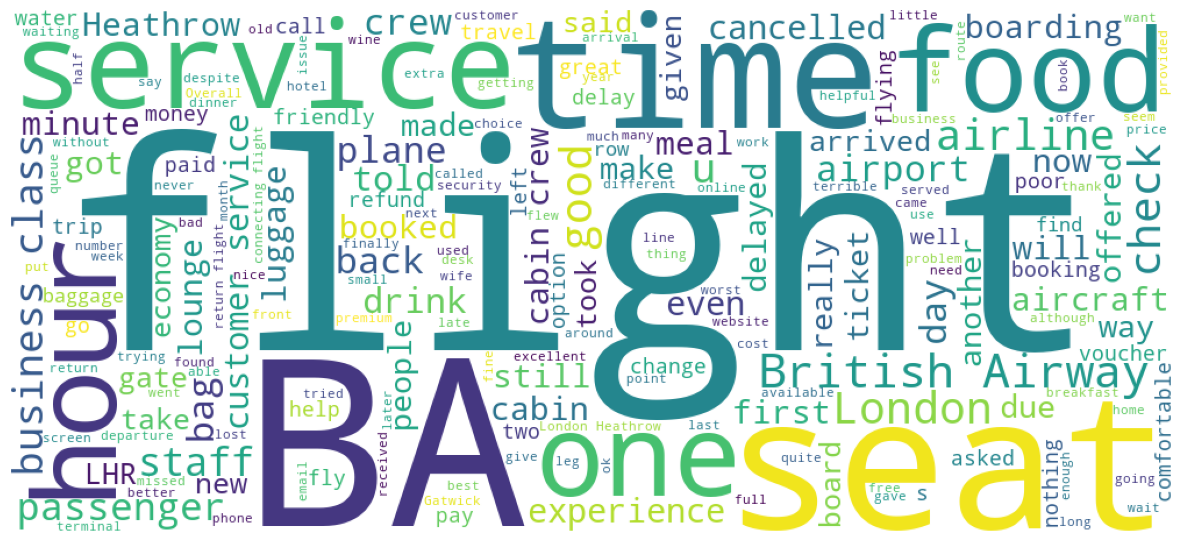

In [23]:
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

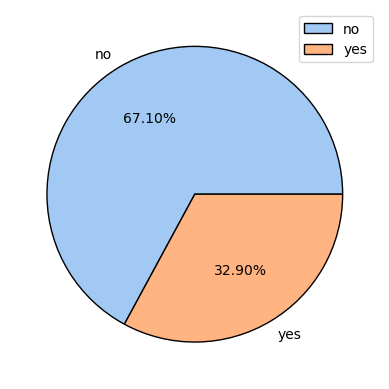

In [24]:
soc = df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels = soc['Recommended'], autopct='%.2f%%',colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()